**EXTRAÇÃO DE DADOS - Portal da Transparência do Governo Federal**


**EXTRAÇÃO DE DADOS - Portal da Transparência do Governo Federal**


In [8]:
import requests
import os
import zipfile
from IPython.display import display
import ipywidgets as widgets


DIRETORIO_DESTINO = "dados_despesa"

MESES = {
    "JANEIRO": "01", "FEVEREIRO": "02", "MARÇO": "03",
    "ABRIL": "04", "MAIO": "05", "JUNHO": "06",
    "JULHO": "07", "AGOSTO": "08", "SETEMBRO": "09",
    "OUTUBRO": "10", "NOVEMBRO": "11", "DEZEMBRO": "12"
}

ANO_FIXO = "2024"


valores_mes = ["Todos"] + list(MESES.keys())
combo_mes = widgets.Dropdown(options=valores_mes, description='Mês:')
botao_baixar = widgets.Button(description='Baixar e Extrair')
output_baixar = widgets.Output()

display(combo_mes, botao_baixar, output_baixar)


def baixar_e_extrair(b):
    mes_nome = combo_mes.value.upper()
    ano = ANO_FIXO

    with output_baixar:
        output_baixar.clear_output()
        if not mes_nome:
            print("Por favor, selecione o mês.")
            return

        if mes_nome == "TODOS":
            meses = list(MESES.values())
        else:
            mes_num = MESES.get(mes_nome)
            if not mes_num:
                print(f"Mês inválido: {mes_nome}")
                return
            meses = [mes_num]

        total = len(meses)
        count = 0

        erros = []
        baixados = []

        os.makedirs(DIRETORIO_DESTINO, exist_ok=True)

        for m in meses:
            count += 1
            print(f"Baixando {count} de {total} ({ano}/{m})...")

            codigo = f"{ano}{m}"
            url = f"https://portaldatransparencia.gov.br/download-de-dados/despesas-execucao/{codigo}"
            nome_zip = f"despesas-execucao-{codigo}.zip"
            caminho_zip = os.path.join(DIRETORIO_DESTINO, nome_zip)

            try:
                resposta = requests.get(url)
                resposta.raise_for_status()

                with open(caminho_zip, "wb") as f:
                    f.write(resposta.content)

                with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
                    zip_ref.extractall(DIRETORIO_DESTINO)

                os.remove(caminho_zip)
                baixados.append(codigo)

            except requests.exceptions.RequestException:
                erros.append(codigo)
            except zipfile.BadZipFile:
                erros.append(codigo)

        print("\nResultado:")
        if baixados:
            print(f"Downloads concluídos para: {', '.join(baixados)}")
        if erros:
            print(f"Falha ao baixar/extrair: {', '.join(erros)}")
        if not baixados and not erros:
            print("Nenhum arquivo baixado.")
        print("Pronto!")



botao_baixar.on_click(baixar_e_extrair)


Dropdown(description='Mês:', options=('Todos', 'JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JUL…

Button(description='Baixar e Extrair', style=ButtonStyle())

Output()

**ANÁLISE RAPIDA DOS DADOS**





Analisando 12 arquivo(s) de 2024...

Total de despesas pagas em 2024: R$ 4,491,448,232,234.16

Despesa total por mês:
 - Janeiro: R$ 530,505,492,985.33
 - Fevereiro: R$ 250,508,880,792.56
 - Março: R$ 420,195,418,088.63
 - Abril: R$ 376,326,291,945.56
 - Maio: R$ 304,843,760,912.20
 - Junho: R$ 260,998,675,575.66
 - Julho: R$ 445,393,361,622.77
 - Agosto: R$ 548,960,856,866.74
 - Setembro: R$ 483,430,354,006.66
 - Outubro: R$ 326,612,974,221.45
 - Novembro: R$ 256,802,777,331.70
 - Dezembro: R$ 286,869,387,884.90



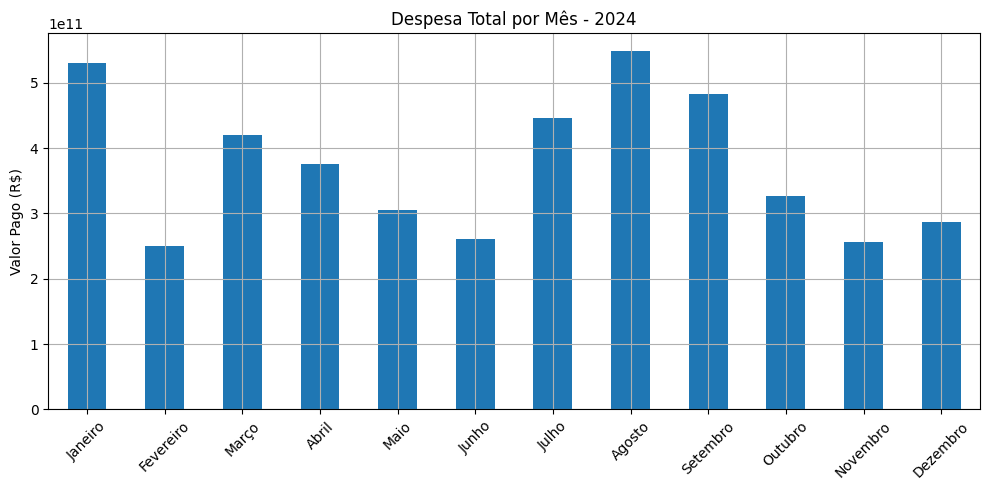

Top 10 órgãos superiores que mais gastaram:
 - Ministério da Fazenda: R$ 2,477,022,122,313.01
 - Ministério da Previdência Social: R$ 975,966,144,896.15
 - Ministério da Saúde: R$ 200,503,314,891.98
 - Ministério do Desenvolvimento e Assistência: R$ 176,943,280,851.97
 - Ministério da Educação: R$ 176,914,482,699.74
 - Ministério da Defesa: R$ 112,971,717,153.98
 - Ministério do Trabalho e Emprego: R$ 108,962,643,843.30
 - Ministério de Minas e Energia: R$ 65,649,567,033.95
 - Ministério da Integração e do Desenvolvime: R$ 32,354,213,085.87
 - Ministério da Gestão e da Inovação em Ser: R$ 26,113,795,044.00



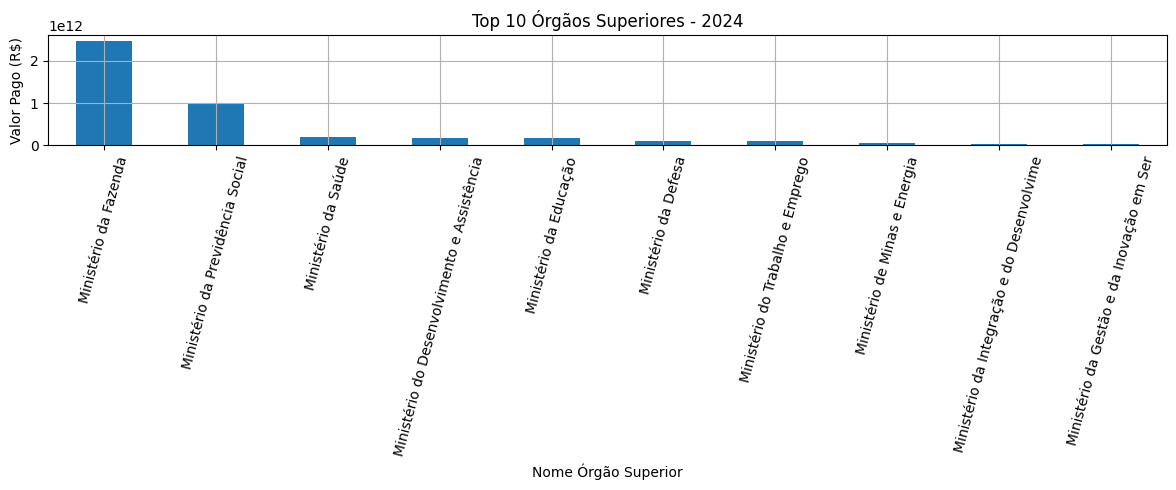

<Figure size 1500x700 with 0 Axes>

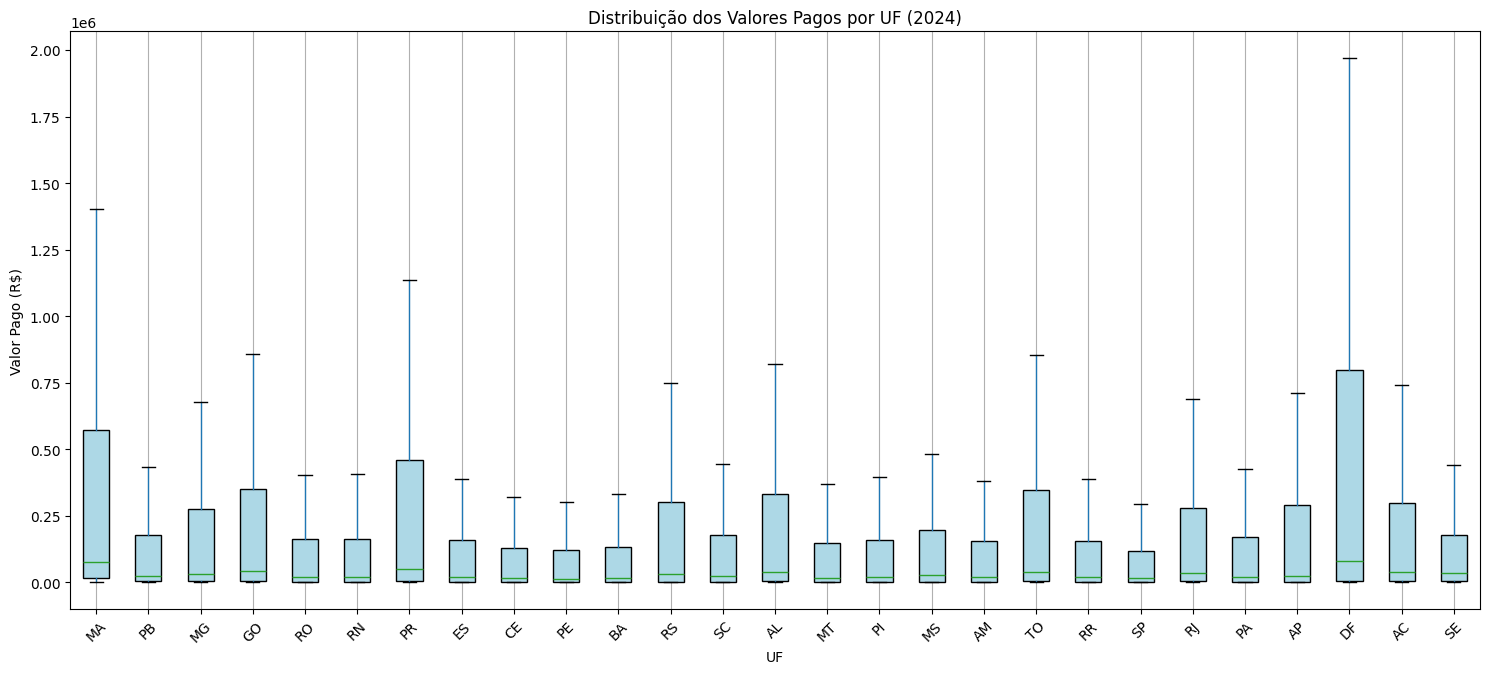

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os


DIRETORIO_DESTINO = "dados_despesa"


MESES = {
    "01": "Janeiro", "02": "Fevereiro", "03": "Março",
    "04": "Abril", "05": "Maio", "06": "Junho",
    "07": "Julho", "08": "Agosto", "09": "Setembro",
    "10": "Outubro", "11": "Novembro", "12": "Dezembro"
}


def analisar_dados_2024():

    arquivos_2024 = [
        f for f in os.listdir(DIRETORIO_DESTINO)
        if f.startswith("2024") and f.endswith("_Despesas.csv")
    ]

    if not arquivos_2024:
        print("Nenhum arquivo de despesa encontrado para 2024.")
        return

    print(f"Analisando {len(arquivos_2024)} arquivo(s) de 2024...\n")

    lista_df = []
    for arq in arquivos_2024:
        caminho = os.path.join(DIRETORIO_DESTINO, arq)
        try:
            df = pd.read_csv(caminho, sep=';', encoding='latin1')

            col_valor = 'Valor Pago (R$)'
            if col_valor not in df.columns:
                print(f"Coluna '{col_valor}' não encontrada em {arq}. Pulando arquivo.")
                continue

            # Tratar valor para número
            df[col_valor] = (
                df[col_valor]
                .astype(str)
                .str.replace('.', '', regex=False)
                .str.replace(',', '.', regex=False)
            )
            df[col_valor] = pd.to_numeric(df[col_valor], errors='coerce').fillna(0)

            # Extrair mês do nome do arquivo
            mes = int(arq[4:6])
            df['Mês'] = mes

            lista_df.append(df)

        except Exception as e:
            print(f"Erro ao ler {arq}: {e}")

    if not lista_df:
        print("Nenhum dado válido para análise.")
        return

    df_total = pd.concat(lista_df, ignore_index=True)
    col_valor = 'Valor Pago (R$)'

    # Total geral
    total = df_total[col_valor].sum()
    print(f"Total de despesas pagas em 2024: R$ {total:,.2f}\n")

    # Despesa por mês
    gastos_mes = df_total.groupby('Mês')[col_valor].sum().sort_index()
    print("Despesa total por mês:")
    for mes_num, valor in gastos_mes.items():
        nome_mes = MESES.get(str(mes_num).zfill(2), f"Mês {mes_num}")
        print(f" - {nome_mes}: R$ {valor:,.2f}")
    print()

    plt.figure(figsize=(10, 5))
    gastos_mes.index = [MESES[str(m).zfill(2)] for m in gastos_mes.index]
    gastos_mes.plot(kind='bar', title='Despesa Total por Mês - 2024')
    plt.ylabel("Valor Pago (R$)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Top 10 órgãos superiores que mais gastaram
    if 'Nome Órgão Superior' in df_total.columns:
        print("Top 10 órgãos superiores que mais gastaram:")
        top_orgaos = (
            df_total.groupby('Nome Órgão Superior')[col_valor]
            .sum()
            .sort_values(ascending=False)
            .head(10)
        )
        for orgao, valor in top_orgaos.items():
            print(f" - {orgao}: R$ {valor:,.2f}")
        print()

        plt.figure(figsize=(12, 5))
        top_orgaos.plot(kind='bar', title='Top 10 Órgãos Superiores - 2024')
        plt.ylabel("Valor Pago (R$)")
        plt.xticks(rotation=75)
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print("Coluna 'Nome Órgão Superior' não encontrada para análise.\n")

    # Boxplot das despesas por UF (Unidade da Federação)
    if 'UF' in df_total.columns:
        plt.figure(figsize=(15, 7))

        df_filtrado = df_total[df_total[col_valor] > 0]


        ordem_ufs = df_filtrado.groupby('UF')[col_valor].median().sort_values().index

        df_filtrado.boxplot(column=col_valor, by='UF', figsize=(15,7), positions=range(len(ordem_ufs)),
                            patch_artist=True, showfliers=False,
                            boxprops=dict(facecolor="lightblue"))
        plt.title("Distribuição dos Valores Pagos por UF (2024)")
        plt.suptitle("")
        plt.xlabel("UF")
        plt.ylabel("Valor Pago (R$)")
        plt.xticks(ticks=range(len(ordem_ufs)), labels=ordem_ufs, rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("Coluna 'UF' não encontrada para análise de boxplot.")


analisar_dados_2024()
